In [44]:
# get the result respectively in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Housing Price Prediction

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import numpy as np
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [46]:
# import dataset
# get out of the ID from test data, just for convenience
hp = pd.read_csv('train.csv')
hp1 = hp

hp_test = pd.read_csv('test.csv')
hp2 = hp_test

zhaomingege = hp2['Id']

## Data Visualization

In [47]:
# seperate the numeric and categorical variables
numeric = hp1.select_dtypes(exclude='object').drop('SalePrice',axis = 1)
categorical = hp1.select_dtypes(include='object')

# numeric.info()
# categorical.info()

<AxesSubplot:>

<AxesSubplot:ylabel='Id'>

<AxesSubplot:>

<AxesSubplot:ylabel='MSSubClass'>

<AxesSubplot:>

<AxesSubplot:ylabel='LotFrontage'>

<AxesSubplot:>

<AxesSubplot:ylabel='LotArea'>

<AxesSubplot:>

<AxesSubplot:ylabel='OverallQual'>

<AxesSubplot:>

<AxesSubplot:ylabel='OverallCond'>

<AxesSubplot:>

<AxesSubplot:ylabel='YearBuilt'>

<AxesSubplot:>

<AxesSubplot:ylabel='YearRemodAdd'>

<AxesSubplot:>

<AxesSubplot:ylabel='MasVnrArea'>

<AxesSubplot:>

<AxesSubplot:ylabel='BsmtFinSF1'>

<AxesSubplot:>

<AxesSubplot:ylabel='BsmtFinSF2'>

<AxesSubplot:>

<AxesSubplot:ylabel='BsmtUnfSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='TotalBsmtSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='1stFlrSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='2ndFlrSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='LowQualFinSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='GrLivArea'>

<AxesSubplot:>

<AxesSubplot:ylabel='BsmtFullBath'>

<AxesSubplot:>

<AxesSubplot:ylabel='BsmtHalfBath'>

<AxesSubplot:>

<AxesSubplot:ylabel='FullBath'>

<AxesSubplot:>

<AxesSubplot:ylabel='HalfBath'>

<AxesSubplot:>

<AxesSubplot:ylabel='BedroomAbvGr'>

<AxesSubplot:>

<AxesSubplot:ylabel='KitchenAbvGr'>

<AxesSubplot:>

<AxesSubplot:ylabel='TotRmsAbvGrd'>

<AxesSubplot:>

<AxesSubplot:ylabel='Fireplaces'>

<AxesSubplot:>

<AxesSubplot:ylabel='GarageYrBlt'>

<AxesSubplot:>

<AxesSubplot:ylabel='GarageCars'>

<AxesSubplot:>

<AxesSubplot:ylabel='GarageArea'>

<AxesSubplot:>

<AxesSubplot:ylabel='WoodDeckSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='OpenPorchSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='EnclosedPorch'>

<AxesSubplot:>

<AxesSubplot:ylabel='3SsnPorch'>

<AxesSubplot:>

<AxesSubplot:ylabel='ScreenPorch'>

<AxesSubplot:>

<AxesSubplot:ylabel='PoolArea'>

<AxesSubplot:>

<AxesSubplot:ylabel='MiscVal'>

<AxesSubplot:>

<AxesSubplot:ylabel='MoSold'>

<AxesSubplot:>

<AxesSubplot:ylabel='YrSold'>

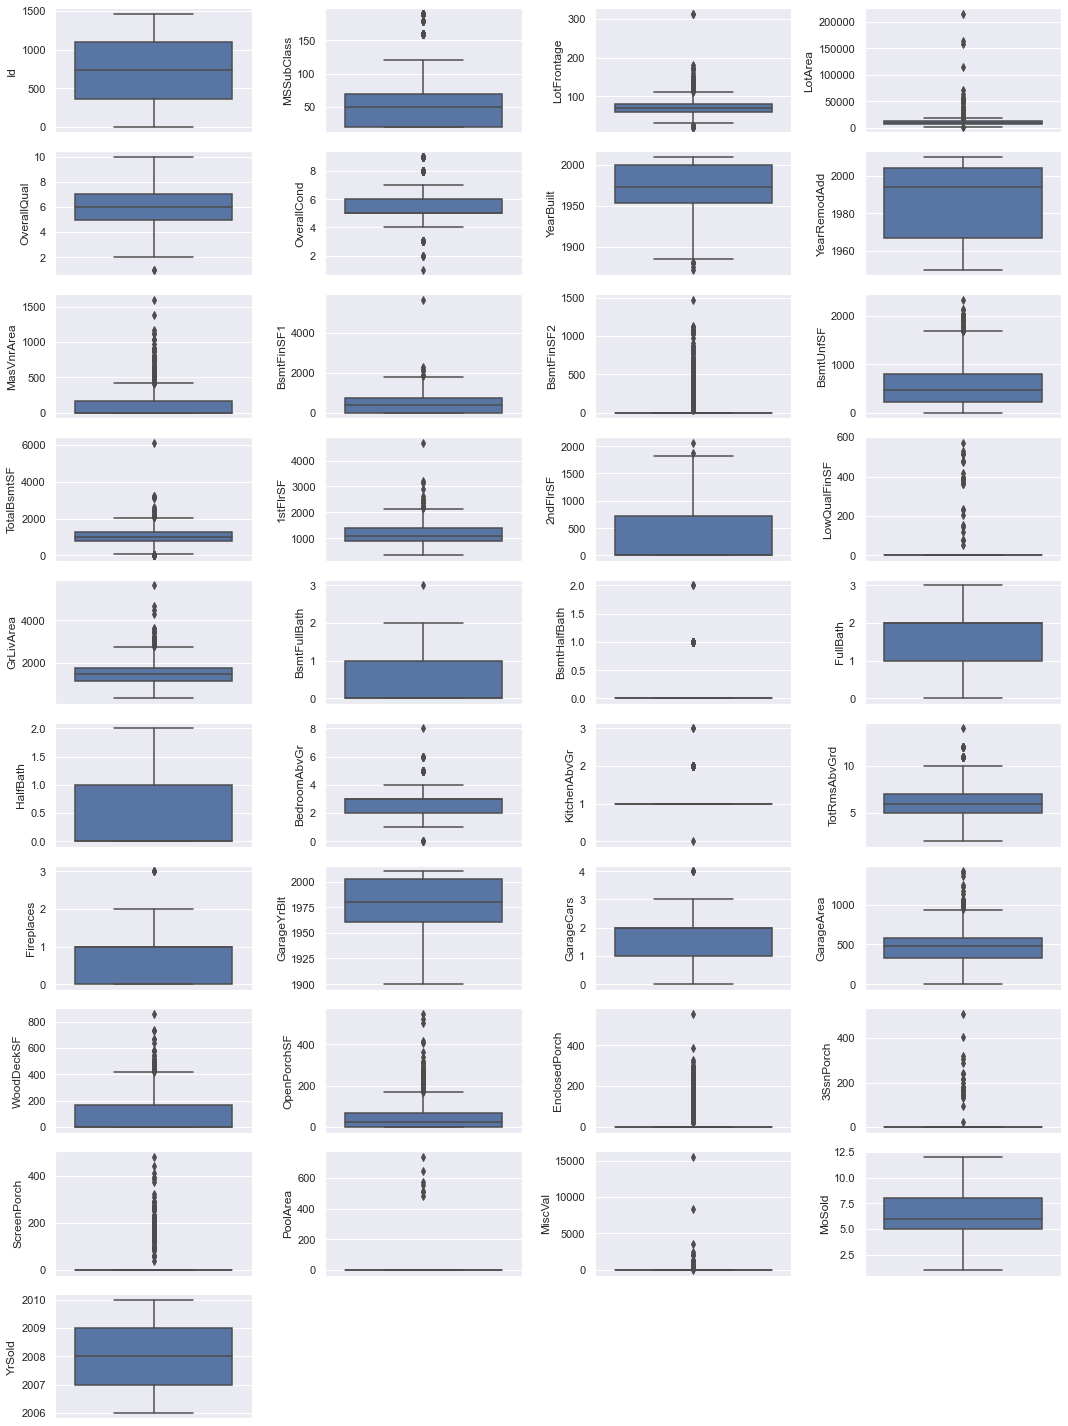

<AxesSubplot:>

<AxesSubplot:xlabel='Id', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='BsmtFinSF2', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='LowQualFinSF', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='BsmtFullBath', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='BsmtHalfBath', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='HalfBath', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='WoodDeckSF', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='OpenPorchSF', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='EnclosedPorch', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='3SsnPorch', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='ScreenPorch', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='PoolArea', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='MiscVal', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

<AxesSubplot:>

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

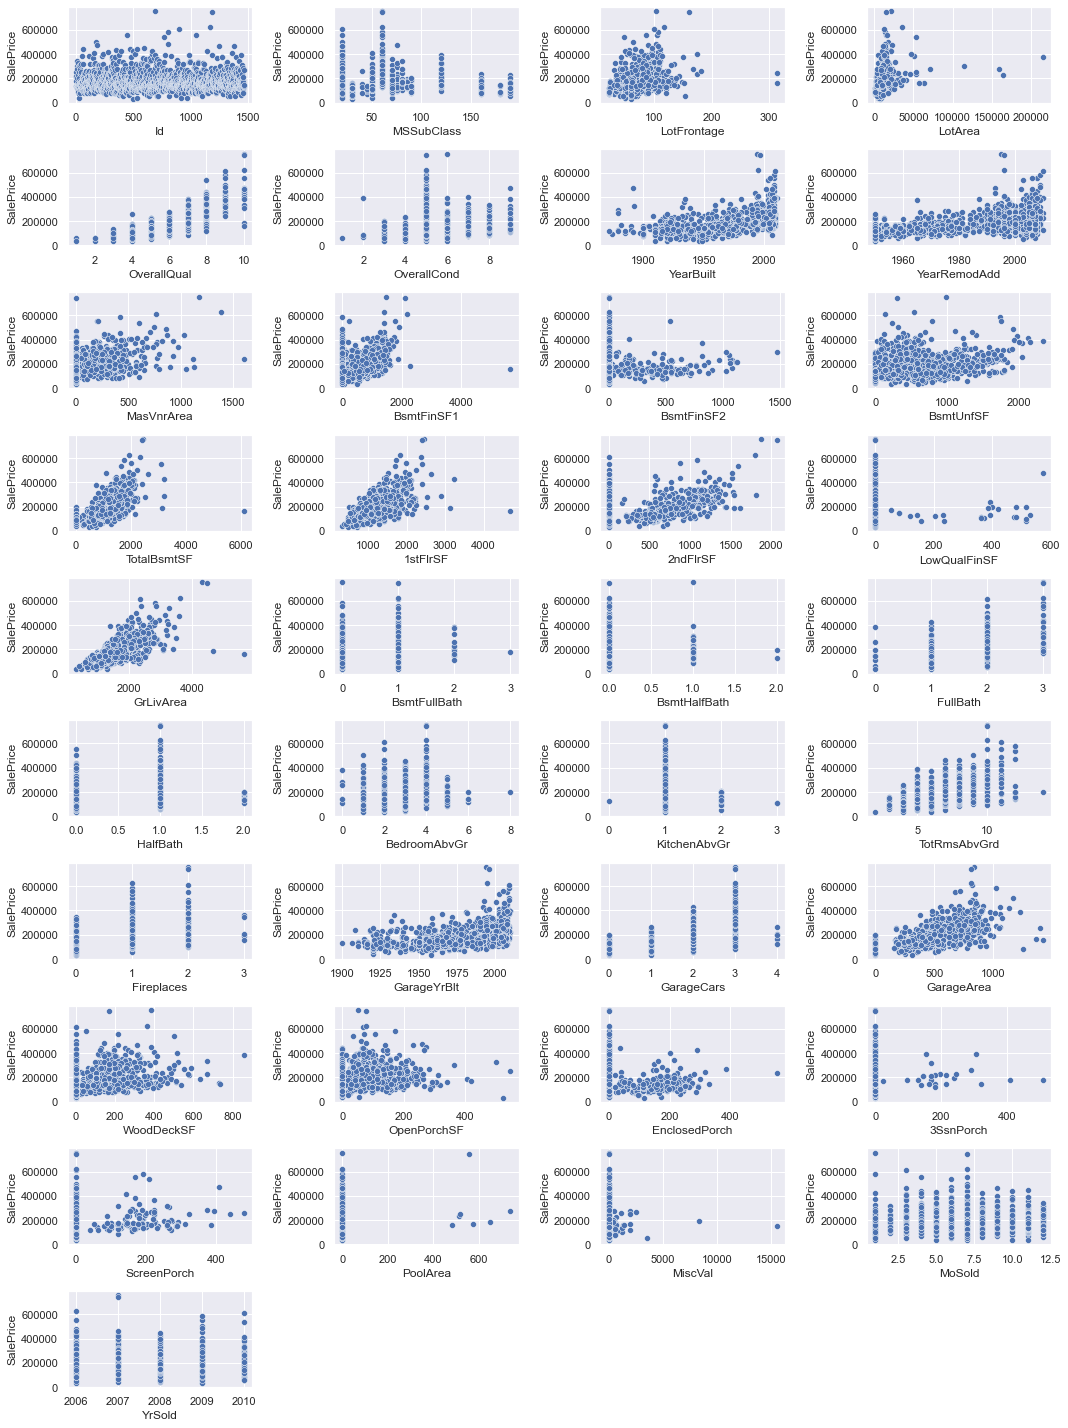

In [48]:
### Distribution of Data
fig = plt.figure(figsize=(15,20))
for i in range(len(numeric.columns)):
    fig.add_subplot(10,4,i+1)
    sns.boxplot(y=numeric.iloc[:,i])

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(15,20)) # graph 的size
for i in range(len(numeric.columns)):
    fig.add_subplot(10, 4, i+1)  # （列，行，总数有多少）+1 是因为0开始数的
    sns.scatterplot(x = numeric.iloc[:,i], y=hp1['SalePrice'],x_jitter=.1) 
    # sns.scatterplot(row, column, 好像还能加其他config)
    # iloc[:, i]前面意思是全部都要， iloc 配的是num, ', i' select 的是row
    # 为啥不用numeric['SalePrice']，因为已经del了在这之前
plt.tight_layout() # 让点在图里面的
plt.show() 

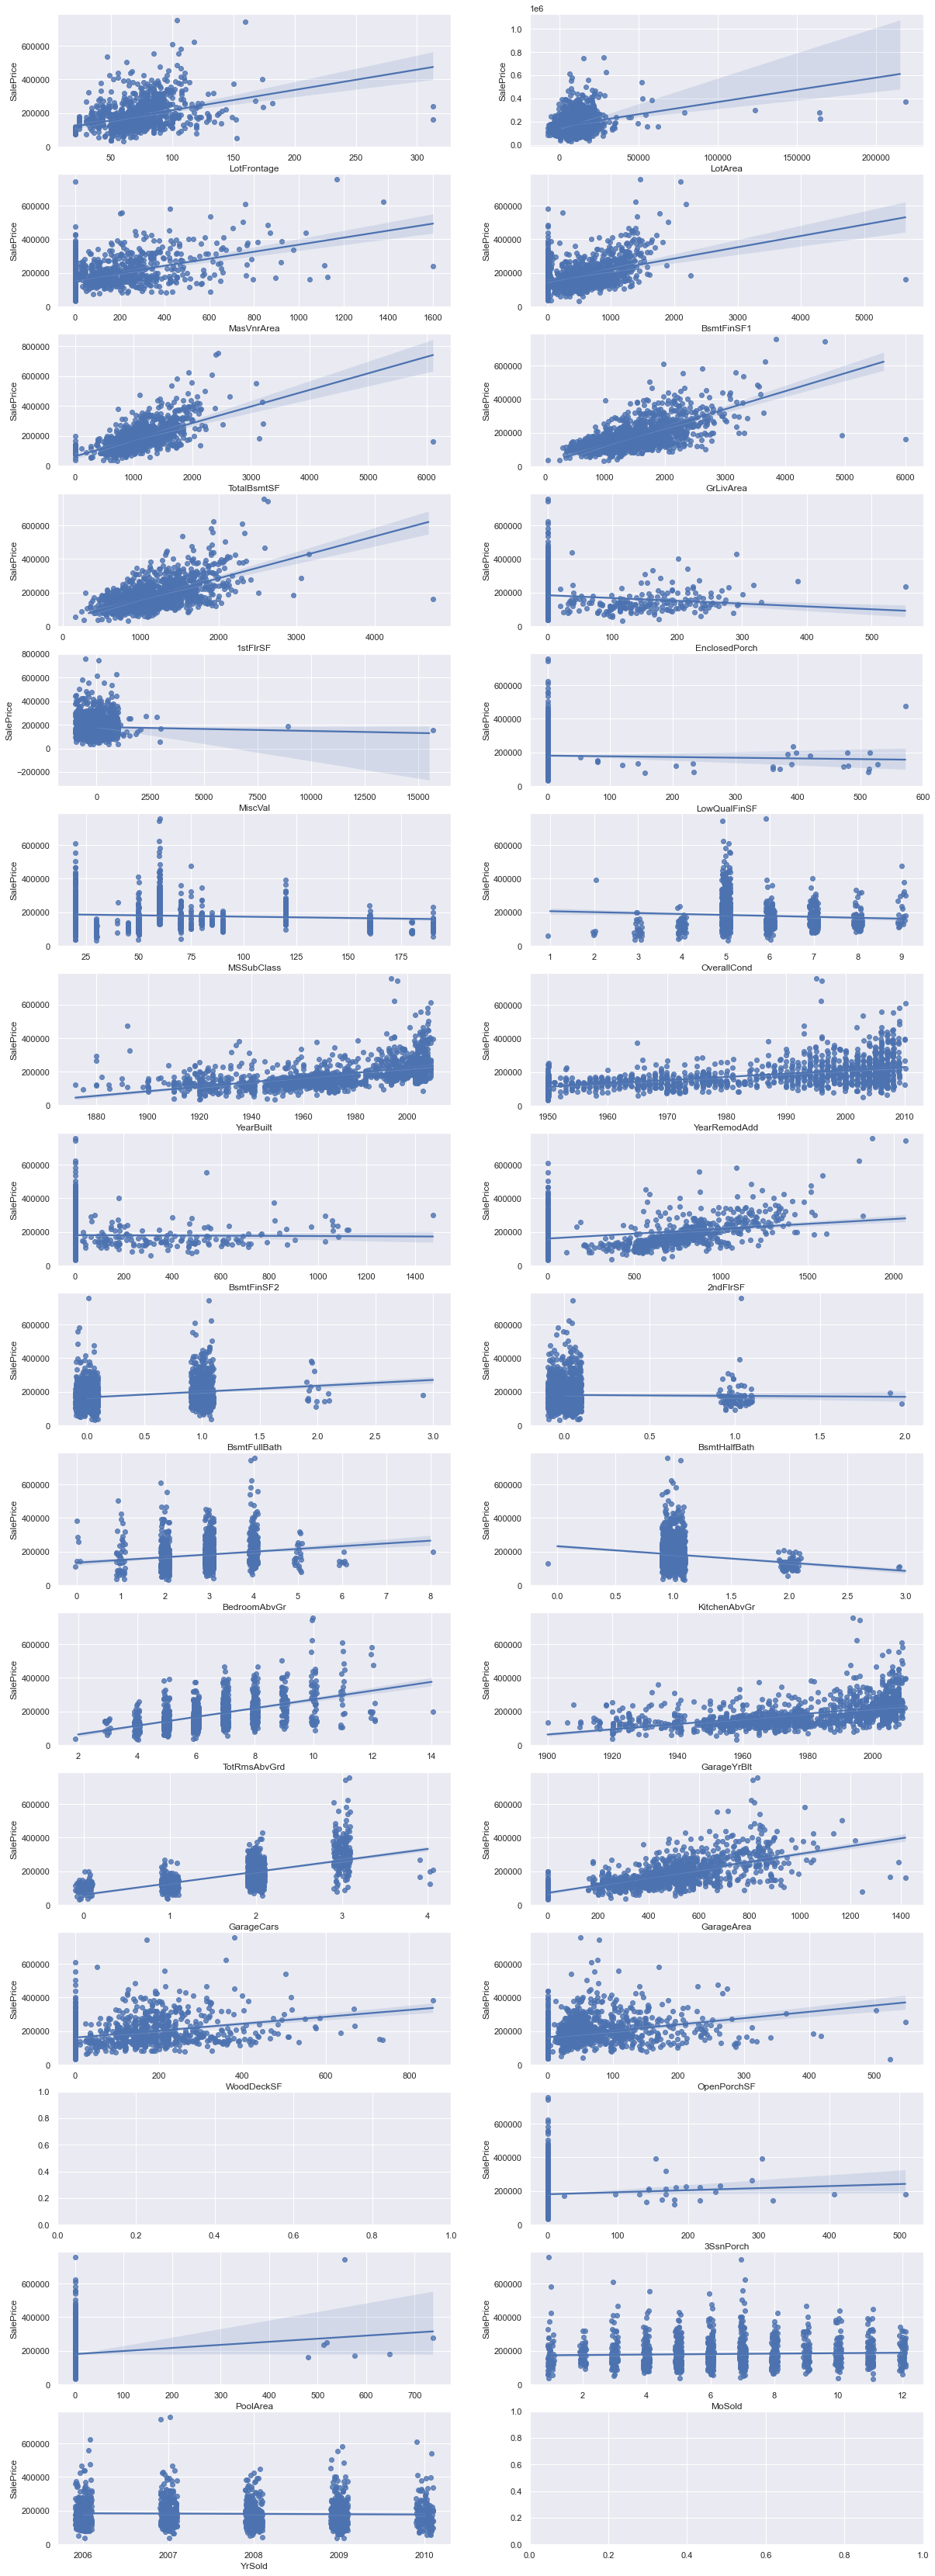

In [49]:
### Outlier

# as we can see, there are many outliers above the graph. 
# MSSubClass, LotFrontage, LotArea, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, TotalBsmtSF, 1stFlrSF
# 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd,GarageYrBlt
# GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, PoolArea, MiscVal, MoSold, YrSold

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)
         ,(ax11, ax12), (ax13, ax14), (ax15, ax16), (ax17, ax18), (ax19, ax20)
         ,(ax21, ax22), (ax23, ax24), (ax25, ax26), (ax27, ax28), (ax29, ax30)
         ,(ax31, ax32)) = plt.subplots(nrows=16, ncols=2, figsize=(0, 10))
figure.set_size_inches(20,60)
_ = sns.regplot(x = hp1['LotFrontage'],y = hp1['SalePrice'], ax=ax1, x_jitter=.1)
_ = sns.regplot(x = hp1['LotArea'], y = hp1['SalePrice'], ax=ax2, x_jitter=10000)
_ = sns.regplot(x = hp1['MasVnrArea'], y = hp1['SalePrice'], ax=ax3, x_jitter=.1)
_ = sns.regplot(x = hp1['BsmtFinSF1'], y = hp1['SalePrice'], ax=ax4, x_jitter=.1)
_ = sns.regplot(x = hp1['TotalBsmtSF'], y = hp1['SalePrice'], ax=ax5, x_jitter=.1)
_ = sns.regplot(x = hp1['GrLivArea'], y = hp1['SalePrice'], ax=ax6, x_jitter=500)
_ = sns.regplot(x = hp1['1stFlrSF'], y = hp1['SalePrice'], ax=ax7, x_jitter= 250)
_ = sns.regplot(x = hp1['EnclosedPorch'], y = hp1['SalePrice'], ax=ax8, x_jitter=.1)
_ = sns.regplot(x = hp1['MiscVal'], y = hp1['SalePrice'], ax=ax9, x_jitter=1000)
_ = sns.regplot(x = hp1['LowQualFinSF'], y = hp1['SalePrice'], ax=ax10, x_jitter=.1)

_ = sns.regplot(x = hp1['MSSubClass'], y = hp1['SalePrice'], ax=ax11, x_jitter=.1)
_ = sns.regplot(x = hp1['OverallCond'], y = hp1['SalePrice'], ax=ax12, x_jitter=.1)
_ = sns.regplot(x = hp1['YearBuilt'], y = hp1['SalePrice'], ax=ax13, x_jitter=.1)
_ = sns.regplot(x = hp1['YearRemodAdd'], y = hp1['SalePrice'], ax=ax14, x_jitter=.1)
_ = sns.regplot(x = hp1['BsmtFinSF2'], y = hp1['SalePrice'], ax=ax15, x_jitter=.1)
_ = sns.regplot(x = hp1['2ndFlrSF'], y = hp1['SalePrice'], ax=ax16, x_jitter=.1)
_ = sns.regplot(x = hp1['BsmtFullBath'], y = hp1['SalePrice'], ax=ax17, x_jitter=.1)
_ = sns.regplot(x = hp1['BsmtHalfBath'], y = hp1['SalePrice'], ax=ax18, x_jitter=.1)
_ = sns.regplot(x = hp1['BedroomAbvGr'], y = hp1['SalePrice'], ax=ax19, x_jitter=.1)
_ = sns.regplot(x = hp1['KitchenAbvGr'], y = hp1['SalePrice'], ax=ax20, x_jitter=.1)
_ = sns.regplot(x = hp1['TotRmsAbvGrd'], y = hp1['SalePrice'], ax=ax21, x_jitter=.1)
_ = sns.regplot(x = hp1['GarageYrBlt'], y = hp1['SalePrice'], ax=ax22, x_jitter=.1)
_ = sns.regplot(x = hp1['GarageCars'], y = hp1['SalePrice'], ax=ax23, x_jitter=.1)
_ = sns.regplot(x = hp1['GarageArea'], y = hp1['SalePrice'], ax=ax24, x_jitter=.1)
_ = sns.regplot(x = hp1['WoodDeckSF'], y = hp1['SalePrice'], ax=ax25, x_jitter=.1)
_ = sns.regplot(x = hp1['OpenPorchSF'], y = hp1['SalePrice'], ax=ax26, x_jitter=.1)
# _ = sns.regplot(x = hp1['EnclosedPorch'], y = hp1['SalePrice'], ax=ax27, x_jitter=.1)
_ = sns.regplot(x = hp1['3SsnPorch'], y = hp1['SalePrice'], ax=ax28, x_jitter=.1)
_ = sns.regplot(x = hp1['PoolArea'], y = hp1['SalePrice'], ax=ax29, x_jitter=.1)
_ = sns.regplot(x = hp1['MoSold'], y = hp1['SalePrice'], ax=ax30, x_jitter=.1)
_ = sns.regplot(x = hp1['YrSold'], y = hp1['SalePrice'], ax=ax31, x_jitter=.1)


In [50]:
# remove some outliers beased on the graph

hp1 = hp1.drop(hp1[hp1['LotFrontage']>200].index)
hp1 = hp1.drop(hp1[hp1['LotArea']>100000].index)
hp1 = hp1.drop(hp1[hp1['MasVnrArea']>1200].index)
hp1 = hp1.drop(hp1[hp1['BsmtFinSF1']>4000].index)
hp1 = hp1.drop(hp1[hp1['TotalBsmtSF']>4000].index)
hp1 = hp1.drop(hp1[(hp1['GrLivArea']>4000) & (hp1['SalePrice']<300000)].index)
hp1 = hp1.drop(hp1[hp1['1stFlrSF']>4000].index)
hp1 = hp1.drop(hp1[hp1['EnclosedPorch']>500].index)
hp1 = hp1.drop(hp1[hp1['MiscVal']>5000].index)
hp1 = hp1.drop(hp1[(hp1['LowQualFinSF']>550) & (hp1['SalePrice']>400000)].index)

hp1 = hp1.drop(hp1[(hp1['MSSubClass']>200) & (hp1['SalePrice']>600000)].index)
hp1 = hp1.drop(hp1[(hp1['OverallCond']>10) & (hp1['SalePrice']>680000)].index)
hp1 = hp1.drop(hp1[(hp1['YearBuilt']>2020) & (hp1['SalePrice']>680000)].index)
hp1 = hp1.drop(hp1[(hp1['YearRemodAdd']>2020) & (hp1['SalePrice']>680000)].index)
hp1 = hp1.drop(hp1[(hp1['BsmtFinSF2']>1190) & (hp1['SalePrice']>680000)].index)
hp1 = hp1.drop(hp1[(hp1['2ndFlrSF']>1750) & (hp1['SalePrice']>680000)].index)
hp1 = hp1.drop(hp1[(hp1['BsmtFullBath']>2.5) & (hp1['SalePrice']>680000)].index)
hp1 = hp1.drop(hp1[(hp1['BsmtHalfBath']>1.50) & (hp1['SalePrice']>680000)].index)
hp1 = hp1.drop(hp1[(hp1['BedroomAbvGr']>7) & (hp1['SalePrice']>680000)].index)
hp1 = hp1.drop(hp1[(hp1['KitchenAbvGr']>3.0) & (hp1['KitchenAbvGr']<0.5) & (hp1['SalePrice']>680000)].index)

hp1 = hp1.drop(hp1[(hp1['TotRmsAbvGrd']>13.5) & (hp1['SalePrice']>680000)].index)
hp1 = hp1.drop(hp1[(hp1['GarageYrBlt']>2020) & (hp1['SalePrice']>680000)].index)
hp1 = hp1.drop(hp1[(hp1['GarageCars']>3.5) & (hp1['SalePrice']>680000)].index)
hp1 = hp1.drop(hp1[(hp1['GarageArea']>1300) & (hp1['SalePrice']>680000)].index)
hp1 = hp1.drop(hp1[(hp1['WoodDeckSF']>750) & (hp1['SalePrice']>680000)].index)
hp1 = hp1.drop(hp1[(hp1['OpenPorchSF']>450) & (hp1['SalePrice']>680000)].index)
hp1 = hp1.drop(hp1[(hp1['3SsnPorch']>350) & (hp1['SalePrice']>680000)].index)
hp1 = hp1.drop(hp1[hp1['PoolArea']>400].index)
hp1 = hp1.drop(hp1[(hp1['MoSold']>13) & (hp1['SalePrice']>680000)].index)
hp1 = hp1.drop(hp1[(hp1['YrSold']>2020) & (hp1['SalePrice']>680000)].index)

<Figure size 1440x1440 with 0 Axes>

Text(0.5, 1.0, 'High Correlation')

<AxesSubplot:title={'center':'High Correlation'}>

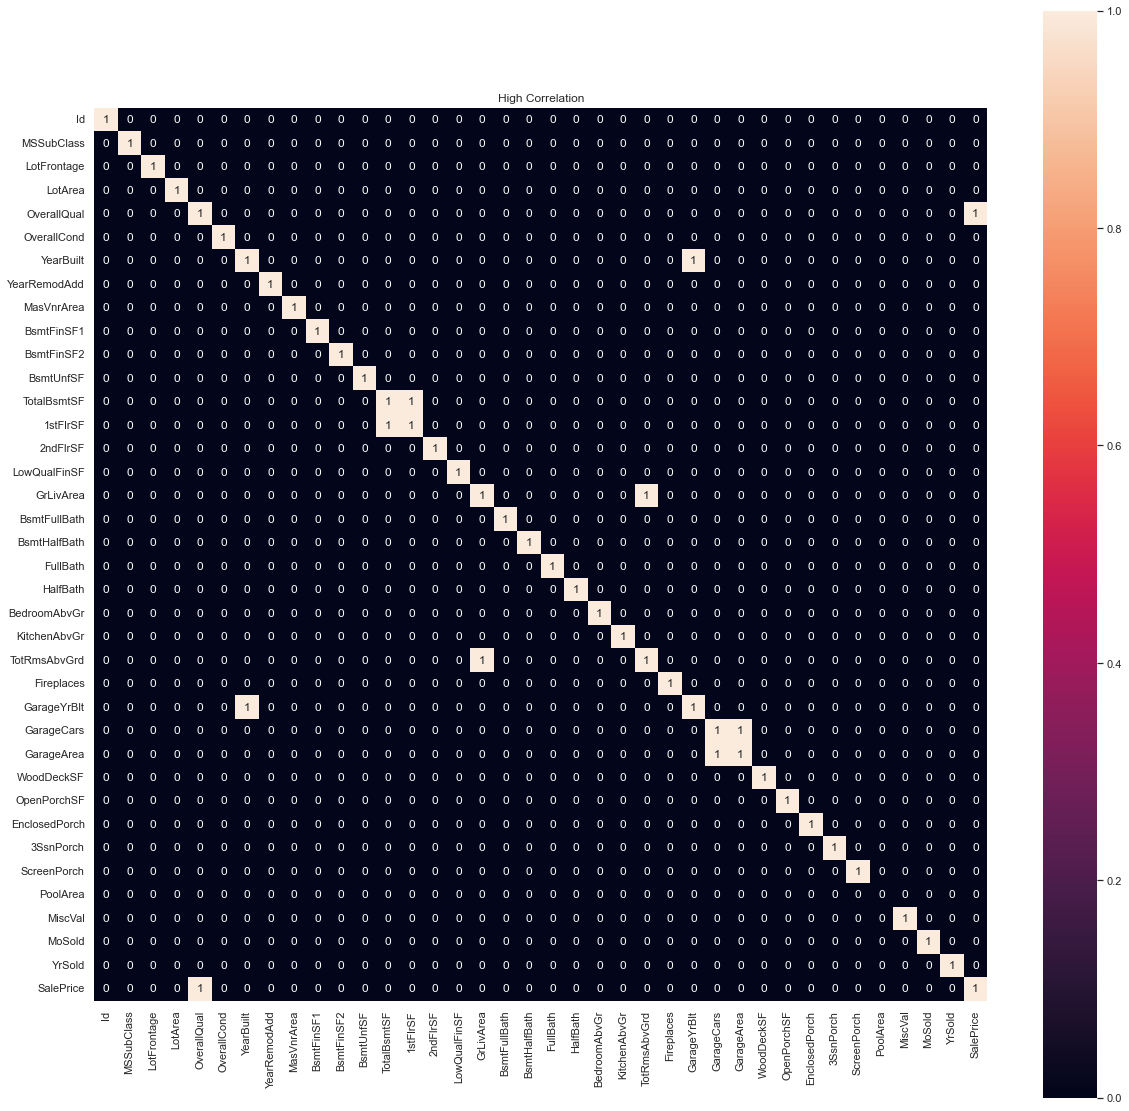

In [51]:
# correlation map to remove some dulplicate columns 
num_correlation = hp1.select_dtypes(exclude='object').corr()
plt.figure(figsize=(20,20))
plt.title('High Correlation')
sns.heatmap(num_correlation > 0.8, annot=True, square=True)

In [52]:
# Highly-Correlated Features:

# YearBuilt vs GarageYrBlt
# 1stFlrSF vs TotalBsmtSF
# GrLivArea vs TotRmsAbvGrd
# GarageCars vs GarageArea
# SalePrices vs OverallQual

In [53]:
corr = num_correlation.corr()
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.958674
GarageCars       0.909316
GarageArea       0.902111
TotalBsmtSF      0.824381
YearBuilt        0.804188
1stFlrSF         0.798859
FullBath         0.794277
MasVnrArea       0.794022
GrLivArea        0.785194
YearRemodAdd     0.771853
GarageYrBlt      0.767529
Fireplaces       0.715243
TotRmsAbvGrd     0.608330
OpenPorchSF      0.590568
LotFrontage      0.586918
WoodDeckSF       0.579184
LotArea          0.515556
BsmtFinSF1       0.486253
BsmtUnfSF        0.447479
HalfBath         0.379734
BsmtFullBath     0.287338
2ndFlrSF         0.218884
BedroomAbvGr     0.159743
ScreenPorch      0.016834
MoSold          -0.013773
3SsnPorch       -0.023951
YrSold          -0.205905
Id              -0.209228
BsmtFinSF2      -0.211203
BsmtHalfBath    -0.267051
MSSubClass      -0.279353
LowQualFinSF    -0.304379
MiscVal         -0.352472
KitchenAbvGr    -0.367179
EnclosedPorch   -0.485788
OverallCond     -0.491241
PoolArea              NaN
Name: SalePr

In [54]:
# drop some useless columns

hp1.drop(columns=['GarageArea','TotRmsAbvGrd','GarageYrBlt','1stFlrSF','OverallQual','PoolArea'],axis=1,inplace=True) 
hp2.drop(columns=['GarageArea','TotRmsAbvGrd','GarageYrBlt','1stFlrSF','OverallQual','PoolArea'],axis=1,inplace=True)

hp1=hp1.drop(columns=['Street','Utilities']) 
hp2=hp2.drop(columns=['Street','Utilities']) 

In [55]:
# drop over 80% missed values

hp1.isnull().mean().sort_values(ascending=False).head()

hp1.drop(columns=['Alley','MiscFeature','PoolQC','Fence'], axis=1, inplace=True)
hp2.drop(columns=['Alley','MiscFeature','PoolQC','Fence'], axis=1, inplace=True)


PoolQC         1.000000
MiscFeature    0.965996
Alley          0.937543
Fence          0.809854
FireplaceQu    0.478140
dtype: float64

## Data Cleaning

In [56]:
# finding null values
null = pd.DataFrame(data={'Home Null Count': hp1.isnull().sum()[hp1.isnull().sum() > 0]
                          , 'Test Null Count': hp2.isnull().sum()[hp2.isnull().sum() > 0]})

null.index.name='Feature'
null

,Home Null Count,Test Null Count
Feature,,
BsmtCond,37.0,45.0
BsmtExposure,38.0,44.0
BsmtFinSF1,NaN,1.0
BsmtFinSF2,NaN,1.0
BsmtFinType1,37.0,42.0
BsmtFinType2,38.0,42.0
BsmtFullBath,NaN,2.0
BsmtHalfBath,NaN,2.0
BsmtQual,37.0,44.0


In [57]:
# check the null values in different
# hp1.isnull().sum().sort_values(ascending=False)[:50]

In [58]:
# get the numeric varibales 
home_num_features = hp1.select_dtypes(exclude='object').isnull().mean()
test_num_features = hp2.select_dtypes(exclude='object').isnull().mean()

In [59]:
# identify the variables which have null
num_null_features = pd.DataFrame(data={'Missing Num Home Percentage: ': home_num_features[home_num_features>0]
                                       , 'Missing Num Test Percentage: ': test_num_features[test_num_features>0]})
num_null_features.index.name = 'Numerical Features'
num_null_features

,Missing Num Home Percentage:,Missing Num Test Percentage:
Numerical Features,,
BsmtFinSF1,NaN,0.000685
BsmtFinSF2,NaN,0.000685
BsmtFullBath,NaN,0.001371
BsmtHalfBath,NaN,0.001371
BsmtUnfSF,NaN,0.000685
GarageCars,NaN,0.000685
LotFrontage,0.175573,0.155586
MasVnrArea,0.005552,0.010281
TotalBsmtSF,NaN,0.000685


In [60]:
# fill na with 0
for df in [hp1, hp2]:
    for col in ('GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'LotFrontage', 
                'MasVnrArea', 'TotalBsmtSF'):
                    df[col] = df[col].fillna(0)

In [61]:
# get the categorical varibales 

home_cat_features = hp1.select_dtypes(include='object').isnull().mean()
test_cat_features = hp2.select_dtypes(include='object').isnull().mean()

In [62]:
num_cat_features = pd.DataFrame(data={'Missing Cat Home Percentage: ': home_cat_features[home_cat_features>0]
                                       , 'Missing Cat Test Percentage: ': test_cat_features[test_cat_features>0]})
num_cat_features.index.name = 'Catagorical Features'
num_cat_features

,Missing Cat Home Percentage:,Missing Cat Test Percentage:
Catagorical Features,,
BsmtCond,0.025677,0.030843
BsmtExposure,0.026371,0.030158
BsmtFinType1,0.025677,0.028787
BsmtFinType2,0.026371,0.028787
BsmtQual,0.025677,0.030158
Electrical,0.000694,NaN
Exterior1st,NaN,0.000685
Exterior2nd,NaN,0.000685
FireplaceQu,0.478140,0.500343


In [63]:
# fill na with 'None'
for df in [hp1, hp2]:
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                  'BsmtFinType2', 'Neighborhood', 'BldgType', 'HouseStyle', 'MasVnrType', 'FireplaceQu'):
        df[col] = df[col].fillna('None')



In [64]:
# fill na with mode[0] 
for df in [hp1, hp2]:
    for col in ('LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Condition1', 'RoofStyle',
                  'Electrical', 'Functional', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'ExterQual', 'ExterCond',
                  'Foundation', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'PavedDrive', 'SaleType', 'SaleCondition','MSZoning'):
        df[col] = df[col].fillna(df[col].mode()[0])

c:\users\jerry\envs\nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\jerry\envs\nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\jerry\envs\nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


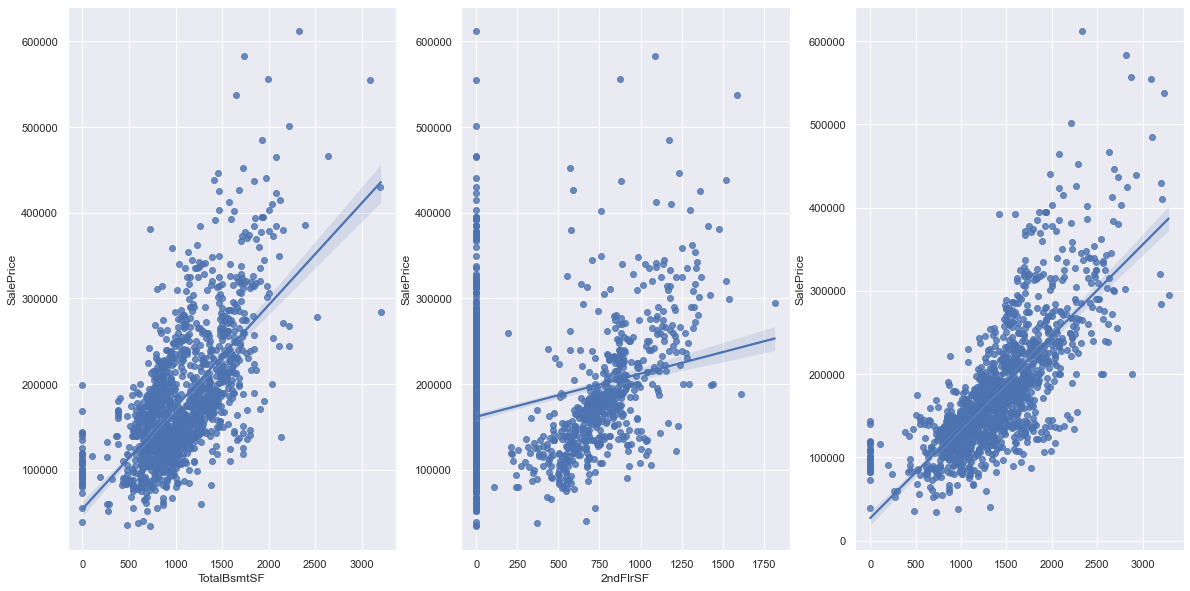

In [65]:
# combine two columns to get a better correlation to the dependent variable 'SalePrice'

figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(20,10)
_ = sns.regplot(hp1['TotalBsmtSF'], hp1['SalePrice'], ax=ax1)
_ = sns.regplot(hp1['2ndFlrSF'], hp1['SalePrice'], ax=ax2)
_ = sns.regplot(hp1['TotalBsmtSF'] + hp1['2ndFlrSF'], hp1['SalePrice'], ax=ax3)

In [66]:
# implement the combination
hp1['TotalSF']=hp1['TotalBsmtSF']  + hp1['2ndFlrSF']
hp2['TotalSF']=hp2['TotalBsmtSF']  + hp2['2ndFlrSF']

In [67]:
# data adjustment

hp1['TotalBath']=hp1['BsmtFullBath'] + hp1['FullBath'] + hp1['BsmtHalfBath'] + hp1['HalfBath']
hp2['TotalBath']=hp2['BsmtFullBath'] + hp2['FullBath'] + hp2['BsmtHalfBath'] + hp2['HalfBath']

hp1['YrBltAndRemod']=(hp1['YearBuilt']+hp1['YearRemodAdd'])/2
hp2['YrBltAndRemod']=(hp2['YearBuilt']+hp2['YearRemodAdd'])/2

hp1['Porch_SF'] = (hp1['OpenPorchSF'] + hp1['3SsnPorch'] + hp1['EnclosedPorch'] + hp1['ScreenPorch'] + hp1['WoodDeckSF'])
hp2['Porch_SF'] = (hp2['OpenPorchSF'] + hp2['3SsnPorch'] + hp2['EnclosedPorch'] + hp2['ScreenPorch'] + hp2['WoodDeckSF'])

hp1['Has2ndfloor'] = hp1['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
hp1['HasBsmt'] = hp1['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
hp1['HasFirePlace'] = hp1['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
hp1['Has2ndFlr']=hp1['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
hp1['HasBsmt']=hp1['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

hp2['Has2ndfloor'] = hp2['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
hp2['HasBsmt'] = hp2['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
hp2['HasFirePlace'] = hp2['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
hp2['Has2ndFlr']=hp2['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
hp2['HasBsmt']=hp2['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

hp1['LotArea'] = hp1['LotArea'].astype(np.int64)
hp2['LotArea'] = hp2['LotArea'].astype(np.int64)
hp1['MasVnrArea'] = hp1['MasVnrArea'].astype(np.int64)
hp2['MasVnrArea'] = hp2['MasVnrArea'].astype(np.int64)

Skew of SalePrice: 1.5044242794539775


(array([ 90., 529., 445., 205.,  96.,  41.,  22.,   7.,   2.,   4.]),
 array([ 34900. ,  92575.7, 150251.4, 207927.1, 265602.8, 323278.5,
        380954.2, 438629.9, 496305.6, 553981.3, 611657. ]),
 <BarContainer object of 10 artists>)

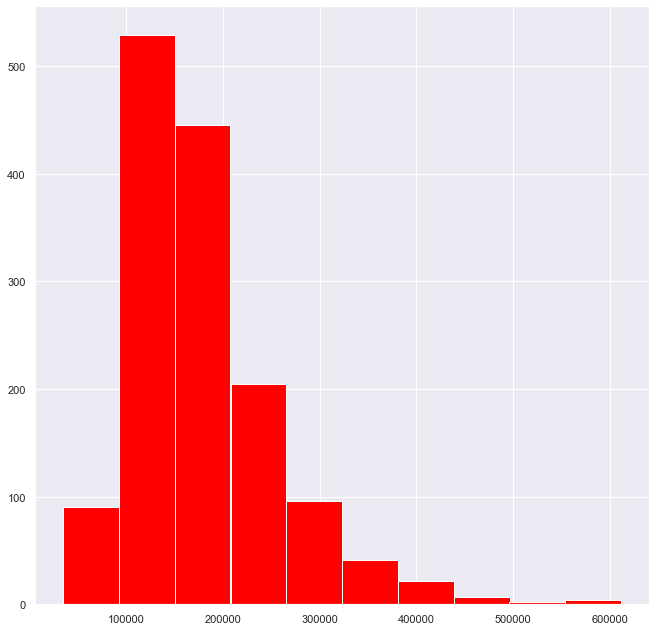

In [68]:
# transform the skew from left to the middle with log
fig = plt.figure(figsize=(11,11))

print ("Skew of SalePrice:", hp1.SalePrice.skew())
plt.hist(hp1.SalePrice, color='red')
plt.show()

Skew of Log-Transformed SalePrice: 0.0492647939120964


(array([  5.,  10.,  31., 126., 406., 418., 255., 136.,  45.,   9.]),
 array([10.46024211, 10.74661059, 11.03297908, 11.31934756, 11.60571604,
        11.89208453, 12.17845301, 12.4648215 , 12.75118998, 13.03755846,
        13.32392695]),
 <BarContainer object of 10 artists>)

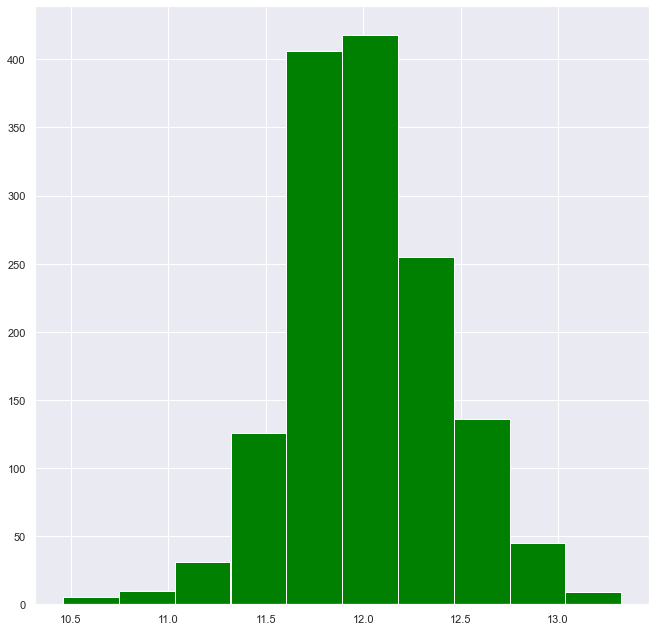

In [69]:
fig = plt.figure(figsize=(11,11))

print ("Skew of Log-Transformed SalePrice:", np.log(hp1.SalePrice).skew())
plt.hist(np.log(hp1.SalePrice), color='green')
plt.show()

# Data modeling

In [70]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LassoCV
from sklearn import metrics 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error

X = hp1.drop(['SalePrice'], axis=1)
y = np.log(hp1['SalePrice'])

In [71]:
# cross validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=2)

In [72]:
# seperate the categorical and numerical cols for preparing the pipeline
categorical_cols = [cname for cname in X.columns if
                    X[cname].nunique() <= 30 and
                    X[cname].dtype == "object"] 
                


numerical_cols = [cname for cname in X.columns if
                 X[cname].dtype in ['int64','float64']]


my_cols = numerical_cols + categorical_cols

X_train = X_train[my_cols].copy()
X_valid = X_valid[my_cols].copy()
X_test = hp2[my_cols].copy()

In [73]:
# setup the pipeline
# SimpleImputer for how compute the numerical variables
# OneHotEncoder for how deal with the categorical variables with get_dummeis

num_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='constant'))
    ])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_cols),       
        ('cat',cat_transformer,categorical_cols),
        ])

In [74]:
# RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100,max_depth=5, random_state=0)
clf_rf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model_rf)])
clf_rf.fit(X_train, y_train)
predict_rf = clf_rf.predict(X_valid)
clf_rf.score(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='constant'))]),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHal...
                                  

0.9119912881584245

In [75]:
# XGBRegressor

model_xgb = XGBRegressor(max_depth=5, random_state=0)
clf_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model_xgb)])
clf_xgb.fit(X_train, y_train)
predict_xgb = clf_xgb.predict(X_valid)
clf_xgb.score(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='constant'))]),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHal...
                              gamm

0.9972607709868754

In [76]:
# Lasso   
model_ls = LassoCV(max_iter=1e7,  random_state=14)
clf_ls = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model_ls)])
clf_ls.fit(X_train, y_train)
predict_ls = clf_ls.predict(X_valid)
clf_ls.score(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='constant'))]),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHal...
                                  

0.8291155678762941

In [81]:
# GradientBoosting   
# Reversing log-transform on y
def inv_y(transformed_y):
    return np.exp(transformed_y)

model_gb = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=5)

clf_gb = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model_gb)])
clf_gb.fit(X_train, y_train)
predict_gb = clf_gb.predict(X_valid)
clf_gb.score(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='constant'))]),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHal...
                                  

0.994016949067299

In [78]:
# calculate the error
mse_rf = mean_squared_error(y_valid, predict_rf)
mse_xgb = mean_squared_error(y_valid, predict_xgb)
mse_ls = mean_squared_error(y_valid, predict_ls)
mse_gb = mean_squared_error(y_valid, predict_gb)

In [79]:
# calculate the MSE for comparison
# we pick the smallest MSE one which is GradientBoostingRegressor
print('MSE: %.3f' % mse_rf)
print('MSE: %.3f' % mse_xgb)
print('MSE: %.3f' % mse_ls)
print('MSE: %.3f' % mse_gb)

MSE: 0.030
MSE: 0.026
MSE: 0.031
MSE: 0.020


In [80]:
# compared the score among those models, GradientBoostingRegressor gives the best result in the kaggle
# of course we can compare them with other methods, like rmse, adjusted R score..
# but BIC and AIC are hard to get cause some of models don't have coef_.

final_model = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model_gb)])

final_model.fit(X_train, y_train)

final_predictions = final_model.predict(X_test)
final_predictions

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='constant'))]),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHal...
                                  

array([11.7352494 , 11.93135457, 12.17444602, ..., 12.00224065,
       11.66631246, 12.35752208])

In [45]:
res = []
for index, pred in enumerate(final_predictions):
    pid = list(zhaomingege)[index]
    res.append({'Id': pid, 'SalePrice': inv_y(pred)})

In [46]:
import csv

with open('niyeshuai.csv', 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=['Id', 'SalePrice'])
    writer.writeheader()
    for x in res:
        writer.writerow(x)

14

24

25

25

25

25

24

24

25

25

25

25

24

24

25

25

24

25

25

25

24

24

25

25

25

23

24

24

25

25

25

25

24

25

25

25

25

23

23

25

25

25

25

24

25

25

25

25

23

24

25

25

25

25

25

25

25

24

25

25

25

25

25

25

25

25

25

23

25

25

25

25

24

25

25

25

25

24

25

25

24

24

25

25

24

25

25

25

25

25

24

25

25

25

25

25

24

24

24

24

25

25

25

25

24

24

25

22

25

25

25

25

25

25

25

24

24

25

25

25

25

24

25

25

24

25

24

23

25

24

25

24

25

25

24

25

24

23

24

25

23

24

25

24

24

25

25

24

24

23

25

25

23

25

25

24

24

24

25

25

24

25

24

25

25

25

25

24

24

25

25

24

23

25

25

25

25

23

25

25

24

25

24

24

25

25

25

25

25

25

25

25

24

24

25

25

24

24

25

25

25

24

24

25

23

24

24

24

25

25

24

25

25

24

25

24

24

25

24

24

24

25

25

25

25

24

25

24

24

24

25

25

25

24

25

25

24

25

25

24

25

25

25

24

25

25

24

25

25

24

25

24

24

24

25

25

25

24

25

24

24

24

25

25

23

25

25

25

25

25

25

25

25

25

25

25

25

25

25

24

25

25

25

25

24

24

25

25

23

24

24

25

25

24

25

24

25

25

24

25

23

24

25

24

25

24

25

24

24

25

25

24

25

25

25

25

25

25

25

25

25

25

24

25

25

25

25

25

24

24

24

25

25

25

25

25

25

25

25

25

23

25

25

25

25

25

25

25

25

25

25

25

25

25

25

24

24

25

25

24

24

23

24

25

24

25

24

24

25

25

25

25

25

25

25

25

25

23

25

25

25

25

25

25

25

25

24

24

24

24

25

25

25

25

25

24

25

25

25

25

25

25

24

25

25

25

23

25

23

25

25

24

22

24

25

25

25

24

24

25

25

24

24

24

25

24

25

25

24

25

25

25

25

25

25

25

25

25

25

24

25

25

25

24

25

25

25

25

25

24

25

25

24

25

25

24

24

25

25

25

25

25

25

25

25

25

25

24

25

25

25

25

25

24

24

25

25

25

25

24

25

25

24

24

24

25

25

25

25

25

23

25

24

25

25

25

25

25

24

25

24

25

24

25

24

25

24

24

24

25

24

24

25

25

22

24

25

24

25

24

25

24

24

25

24

25

25

25

25

25

25

25

25

25

25

24

25

23

23

25

25

24

25

25

25

25

25

24

25

24

24

25

25

25

24

25

25

25

25

25

25

25

25

25

25

25

25

25

24

24

25

25

25

25

25

24

25

25

25

25

25

25

24

25

25

25

25

24

25

24

25

25

25

25

24

24

25

25

24

24

25

25

25

25

24

25

25

25

24

24

25

24

25

23

25

25

25

25

23

25

25

25

25

24

25

25

24

25

24

24

24

25

24

25

25

24

24

25

25

24

24

25

24

23

24

25

24

25

25

25

25

25

25

25

25

24

25

25

25

25

25

24

25

24

24

25

25

25

25

24

24

25

25

25

25

24

24

25

25

25

25

25

25

25

25

24

23

25

25

25

24

24

24

25

25

25

25

25

23

25

25

25

24

24

25

25

25

25

25

24

25

24

24

25

25

24

24

25

25

24

22

24

24

25

25

25

23

25

25

25

24

24

24

25

21

24

24

25

25

24

25

25

25

25

25

25

24

24

24

24

25

25

24

25

25

23

25

24

24

24

24

24

25

25

25

25

24

25

24

25

25

24

25

25

23

25

24

25

25

24

25

25

25

25

25

25

25

25

25

24

25

24

24

25

25

24

25

24

25

25

24

24

25

24

24

25

25

25

24

25

25

25

25

24

25

25

25

25

25

25

25

24

25

25

25

23

25

25

24

24

24

25

25

25

25

24

25

25

24

25

23

24

25

24

25

25

25

25

25

25

24

24

25

24

24

24

25

24

25

25

25

25

25

25

25

25

25

25

24

24

24

24

24

24

24

25

24

25

24

25

24

25

25

25

25

24

25

25

25

25

25

25

25

24

25

25

25

25

24

25

25

25

24

24

25

25

25

25

25

24

25

25

25

25

25

25

24

25

25

25

25

24

25

25

25

25

25

25

24

25

25

25

25

25

25

24

25

25

25

24

24

25

25

25

25

25

25

25

24

25

24

25

24

24

24

25

25

25

25

24

25

24

25

25

25

25

25

25

25

25

25

25

24

25

25

25

25

25

25

25

25

24

24

25

25

23

25

25

24

25

25

24

24

24

25

24

25

25

25

25

24

25

24

25

25

24

25

25

24

24

25

25

25

25

24

24

23

25

25

24

25

25

25

25

25

25

25

25

25

23

25

24

25

25

25

24

25

25

25

24

25

24

25

24

25

25

24

24

24

25

25

24

25

25

24

25

25

24

25

25

25

25

25

25

25

24

24

25

25

25

25

25

24

25

25

24

25

24

23

25

25

25

25

24

25

25

25

25

23

24

24

25

25

24

25

25

25

22

25

25

25

25

25

25

25

25

25

24

25

25

25

24

25

25

25

25

25

25

24

24

25

25

25

24

24

24

24

25

24

25

25

24

25

24

24

24

24

25

24

25

25

25

24

24

23

24

23

25

25

24

25

25

24

25

25

24

25

24

24

25

24

25

25

25

25

24

23

24

24

24

25

24

25

24

25

24

24

25

25

24

24

24

25

23

25

24

24

24

25

24

25

25

24

25

25

24

24

24

25

24

24

25

25

25

25

24

25

23

24

25

24

25

25

24

25

25

25

25

24

23

25

24

25

24

24

23

25

25

25

25

24

25

25

25

25

24

25

25

24

25

25

25

25

25

23

25

24

24

25

25

24

25

24

24

25

25

24

25

25

25

25

24

24

24

25

25

24

25

25

25

25

25

25

25

25

25

25

25

25

24

24

25

25

24

25

24

25

25

25

25

25

24

24

25

24

24

25

24

24

25

25

25

25

24

25

24

24

24

25

25

24

25

25

25

25

25

25

25

25

24

24

25

25

25

25

25

24

24

24

24

25

25

25

25

25

25

24

25

25

25

24

23

25

25

24

24

24

25

25

25

24

24

25

25

25

24

25

25

25

25

25

24

25

24

25

24

25

25

25

25

25

25

24

24

25

25

25

24

25

25

25

25

25

25

21

25

25

24

25

25

24

25

24

25

25

24

25

23

25

25

25

24

24

25

25

25

25

23

24

25

25

24

25

24

25

25

25

25

25

25

24

25

24

24

25

25

25

24

25

25

24

24

24

24

24

24

24

24

25

24

25

25

25

25

24

24

24

25

25

24

24

24

25

24

23

24

24

25

25

25